## Extract a Graph Representation Using ClangDriver

In [1]:
# Copyright 2021 Anderson Faustino da Silva.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

In [2]:
# Imports
from graphviz import Source

In [3]:
# Import YaCoS modules

# Import R -> representation
from yacos.info import compy as R
# Import the driver
from yacos.info.compy.extractors import ClangDriver

In [4]:
# Instantiate the LLVM driver
driver = ClangDriver(ClangDriver.ProgrammingLanguage.C,
                     ClangDriver.OptimizationLevel.O0,
                     [("/usr/include", ClangDriver.IncludeDirType.System)],
                     ["-Wall"])

In [5]:
# Instantiate the builder
builder = R.LLVMGraphBuilder(driver)

In [6]:
# Define the visitor
# Here we will extract CFG + call + compact
visitor = R.LLVMCFGCallCompactVisitor

In [7]:
# ClangDriver compiles source code
# So, let's indicate the code

filename = './data/benchmarks/Others/Fibonacci/fibonacci.c'

In [8]:
# Let's extract information from the source code
extractionInfo = builder.source_to_info(filename)

In [9]:
# Build the representation
representation = builder.info_to_representation(extractionInfo, visitor)

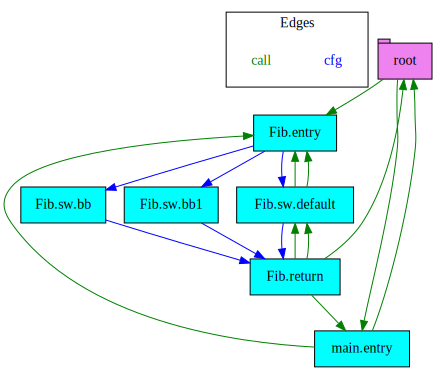

In [10]:
# Let's plot the graph
graph = representation.draw(with_legend=True)
Source(graph.decode())
